# #30DayMapChallenge 2025
## Day 1: Points

### Setup

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Incidents

In [8]:
# Load the Excel file
df = pd.read_excel('MountainRescueIncidents.xlsx')

In [9]:
df.head()

,Description,Date,Coordinates
0,Kayaker Rescued from Ullswater,2024-04-27,NE 44460 20340
1,Missing person search,2023-02-21,NY 22448 07818
2,Patterdale MRT assist with major search in the...,2021-12-30,NY 23520 12080
3,Crashed vehicle on Kirkstone,2023-12-02,NY 24917 24917
4,Keswick Incident,2022-03-24,NY 26200 13600


In [10]:
# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns for Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [16]:
# Define the 100km grid square offsets
grid_squares = {
    'NY': (300000, 500000),
    'SD': (300000, 400000),
    'NE': (400000, 500000)
}

In [17]:
# Function to convert OS Grid Reference to full x, y
def os_grid_to_xy(grid_ref):
    try:
        parts = grid_ref.split()
        square = parts[0]
        easting = int(parts[1])
        northing = int(parts[2])
        offset_e, offset_n = grid_squares.get(square, (0, 0))
        x = offset_e + easting
        y = offset_n + northing
        return pd.Series({'x': x, 'y': y})
    except:
        return pd.Series({'x': None, 'y': None})

In [18]:
# Apply to dataframe to obtain x and y coordinates
df[['x', 'y']] = df['Coordinates'].apply(os_grid_to_xy)

# Preview result
print(df[['Coordinates', 'x', 'y']].head())

      Coordinates       x       y
0  NE 44460 20340  444460  520340
1  NY 22448 07818  322448  507818
2  NY 23520 12080  323520  512080
3  NY 24917 24917  324917  524917
4  NY 26200 13600  326200  513600


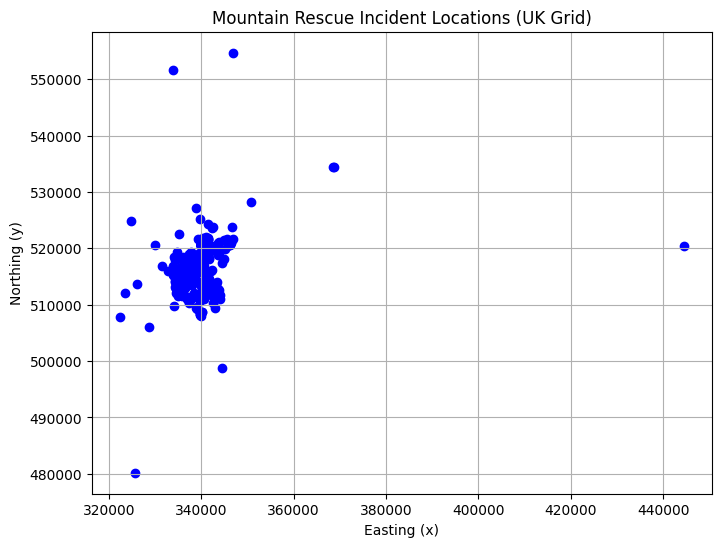

In [20]:
# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='blue', marker='o')

# Label axes
plt.xlabel('Easting (x)')
plt.ylabel('Northing (y)')
plt.title('Mountain Rescue Incident Locations (UK Grid)')

# Show plot
plt.grid(True)
plt.show()

In [24]:
# Save results
df.to_csv('RescueIncidents_Processed.csv', index=False)

### Wainwrights

In [8]:
# Load the Excel file
df2 = pd.read_excel('Wainwrights.xlsx')

In [9]:
df2.head()

,Height Rank,Wainwright Fell Name,Height (m),Height (ft),Grid Reference,Explorer Map,Landranger Map,Wainwright Book,DoBIH Classification
0,1st,Scafell Pike,978,3209,NY215072,OL6,"89, 90",Southern Fells,"Ma, F, Sim, Hew, N, W, B, Sy, Fel, CoH, CoU, CoA"
1,2nd,Scafell,964,3162,NY206064,OL6,"89, 90",Southern Fells,"Hu, F, Sim, Hew, N, W, B, Sy, Fel"
2,3rd,Helvellyn,950,3116,NY342151,OL5,90,Eastern Fells,"Ma, F, Sim, Hew, N, W, B, Sy, Fel, CoH"
3,4th,Skiddaw,930,3052,NY260290,OL4,"89, 90",Northern Fells,"Ma, F, Sim, Hew, N, W, B, Sy, Fel"
4,5th,Great End,910,2984,NY226083,OL6,"89, 90",Southern Fells,"Sim, Hew, N, W, B, Sy, Fel"


In [10]:
# Define 100km grid square offsets
grid_squares = {
    'NY': (300000, 500000),
    'SD': (300000, 400000),
    'NE': (400000, 500000)
}

In [11]:
# Function to convert short-form grid reference to x, y
def short_grid_to_xy(ref):
    try:
        square = ref[:2]
        easting_str = ref[2:5]
        northing_str = ref[5:8]
        offset_e, offset_n = grid_squares.get(square, (0, 0))
        x = offset_e + int(easting_str) * 100
        y = offset_n + int(northing_str) * 100
        return pd.Series({'x': x, 'y': y})
    except:
        return pd.Series({'x': None, 'y': None})

In [12]:
# Apply to Wainwright data
df2[['x', 'y']] = df2['Grid Reference'].apply(short_grid_to_xy)

# Preview result
print(df2[['Grid Reference', 'x', 'y']].head())

  Grid Reference       x       y
0       NY215072  321500  507200
1       NY206064  320600  506400
2       NY342151  334200  515100
3       NY260290  326000  529000
4       NY226083  322600  508300


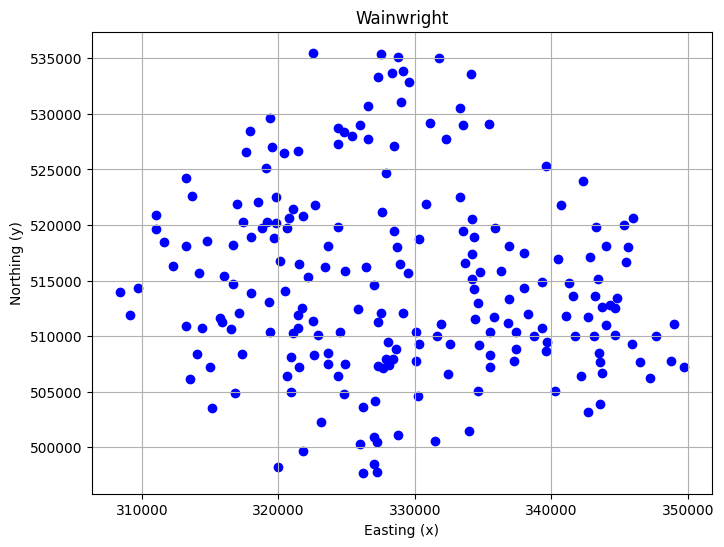

In [13]:
# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(df2['x'], df2['y'], color='blue', marker='o')

# Label axes
plt.xlabel('Easting (x)')
plt.ylabel('Northing (y)')
plt.title('Wainwright')

# Show plot
plt.grid(True)
plt.show()

In [16]:
# Save results
df2.to_csv('Wainwrights_Processed.csv', index=False)